<a href="https://colab.research.google.com/github/nikitpronin/AI_Labs/blob/main/Lab2_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.5.0


Загрузка набора данных

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step



*   train_images и train_labels представляют собой обучающий набор - данные, которые модель использует для обучения.

*   Модель тестируется с использованием набора test_images , массивов test_images и test_labels .

    

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)


60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)


10000

Предобработка данных

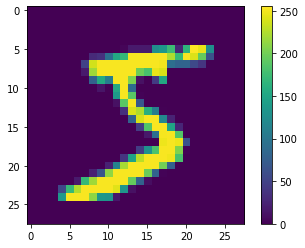

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


масштабируем значения

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [12]:
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']


Отобразим первые 25 изображений из обучающего набора

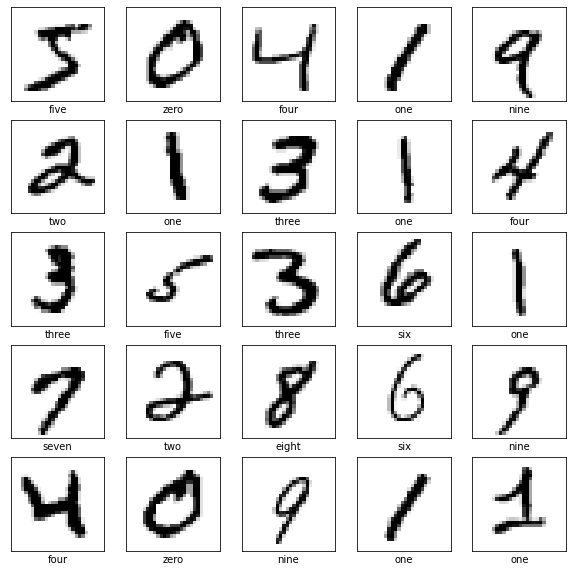

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Строим модель

 Первый слой в этой сети, tf.keras.layers.Flatten , преобразует формат изображений из двумерного массива (размером 28 на 28 пикселей) в одномерный массив (размером 28 * 28 = 784 пикселей). Думайте об этом слое как о разделении рядов пикселей на изображении и их выравнивании. У этого слоя нет параметров для изучения; он только переформатирует данные.

После сглаживания пикселей сеть состоит из последовательности двух слоев tf.keras.layers.Dense . Это плотно связанные или полностью связанные нейронные слои. Первый Dense слой имеет 128 узлов (или нейронов). Второй (и последний) уровень возвращает массив логитов длиной 10. Каждый узел содержит оценку, которая указывает, что текущее изображение принадлежит одному из 10 классов.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


Компиляция модели

In [15]:
'''
    Функция потерь - измеряет, насколько точна модель во время обучения. Вы хотите минимизировать эту функцию, чтобы «направить» модель в правильном направлении.
    Оптимизатор - так модель обновляется на основе данных, которые она видит, и функции потерь.
    Метрики - используются для отслеживания этапов обучения и тестирования. В следующем примере используется точность - доля правильно классифицированных изображений.
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Кормим модель

In [16]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2543 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1130 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0780 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0455 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

Эта модель достигает точности около 0,99 (или 99%) на данных обучения.

Сравним на тестовых данных

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.0852 - accuracy: 0.9773

Test accuracy: 0.9772999882698059


точность тестового набора данных немного меньше точности обучающего набора данных. 

 Делаем предсказания

In [18]:
#слой softmax, преобразует логиты (линейные выходы) в вероятности, которые легче интерпретировать.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [19]:
predictions = probability_model.predict(test_images)


Смотрим на прогноз

In [20]:
predictions[0]


array([4.15224929e-12, 8.29194298e-14, 1.20359145e-08, 1.24306254e-07,
       4.35975481e-15, 1.17656149e-10, 4.98297902e-18, 9.99999881e-01,
       1.48194998e-10, 5.57469946e-08], dtype=float32)

Узнаем какая из меток имеет больший процент достоверности

In [21]:
np.argmax(predictions[0])


7

In [22]:
test_labels[0]


7

Классификация верна!

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Посмотрим на нулевое изображение

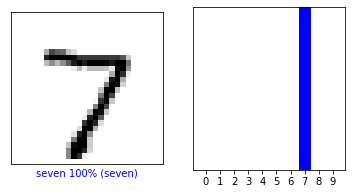

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Посмотрим прогнозы

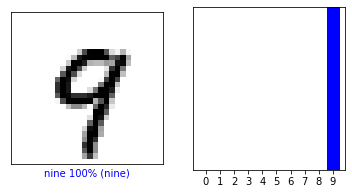

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


И массив прогнозов

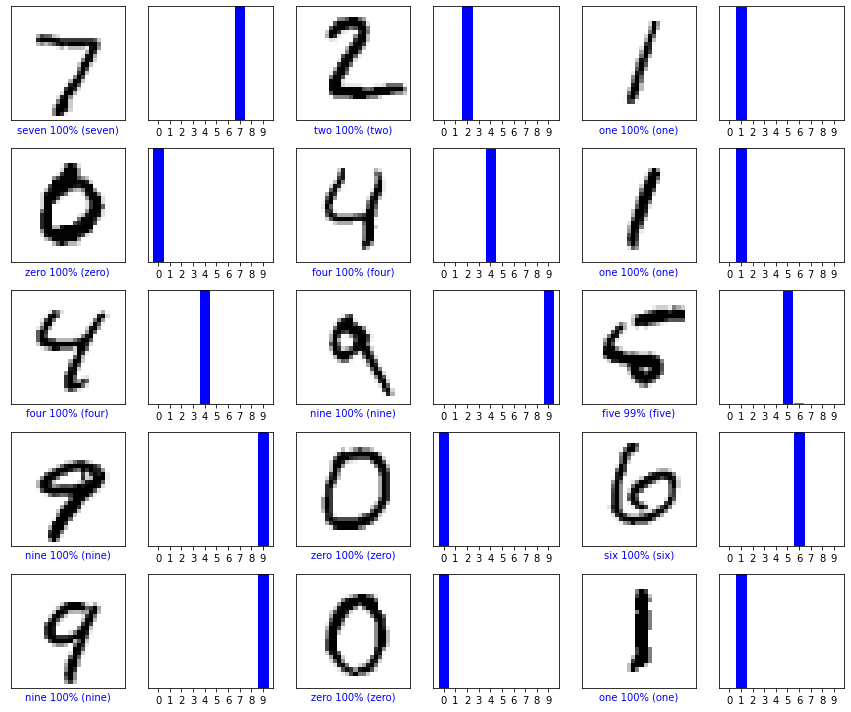

In [26]:
# Правильные прогнозы раскрашены синим цветом, а неправильные - красным.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Использование обученной модели

In [29]:
img = test_images[1]

print(img.shape)

#добавим изображение в пакет

img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [30]:
# предскажем что на изображении
predictions_single = probability_model.predict(img)

print(predictions_single)


[[1.7903199e-13 2.2689642e-07 9.9999964e-01 2.5677761e-12 1.4896261e-22
  8.6455344e-08 6.7182002e-09 1.1348036e-17 1.6021145e-08 1.3108023e-18]]


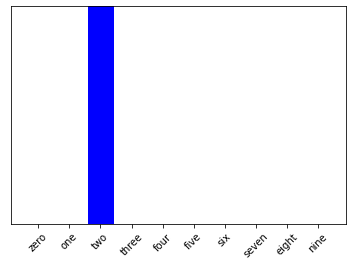

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [32]:
np.argmax(predictions_single[0])


2